In [1]:
# Is MS Dhoni still good enough to bat
# Step 1: As MS Dhoni currently plays in IPL only we will consider IPL T20 data
# Step 2: Calculate the runs scored in IPL and compare with other batters
# Step 3: Visual representation of how MS Dhoni is placed in the top IPL batters

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
# Import IPL ball by ball data csv file 
# *** P.S. IPL data avaible till 2021 ***

In [4]:
dataFrameOG = pd.read_csv('IPL_ball_by_ball_updated.csv')

In [5]:
dataFrameOG.head(1)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [6]:
dataFrameOG.shape

(225954, 22)

In [7]:
dataFrameOG['start_date'] = pd.to_datetime(dataFrameOG['start_date'])
dataFrameOG['year'] = dataFrameOG['start_date'].dt.year

In [8]:
dataFrameOG.dtypes

match_id                  int64         
season                    object        
start_date                datetime64[ns]
venue                     object        
innings                   int64         
ball                      float64       
batting_team              object        
bowling_team              object        
striker                   object        
non_striker               object        
bowler                    object        
runs_off_bat              int64         
extras                    int64         
wides                     float64       
noballs                   float64       
byes                      float64       
legbyes                   float64       
penalty                   float64       
wicket_type               object        
player_dismissed          object        
other_wicket_type         float64       
other_player_dismissed    float64       
year                      int64         
dtype: object

In [9]:
dataFrameOG.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2008
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008


In [10]:
dataFrameOG['year'] = dataFrameOG['year'].astype('int')
dataFrameOG['runs_off_bat'] = dataFrameOG['runs_off_bat'].astype('int')

In [11]:
dataFrameOG.innings.unique()

array([1, 2, 3, 4, 5, 6])

In [12]:
# dataFrame = dataFrameOG[(dataFrameOG.innings == 1) | (dataFrameOG.innings == 2)]

In [13]:
# dataFrame.innings.unique()

In [14]:
# IPL data considered post 2018 (2019-2022)
dataFrameDO = dataFrameOG[(dataFrameOG.year > 2018) & (dataFrameOG.year <= 2022)]

# Last 4 years data only
dataFrameL4Y = dataFrameDO

# Last 4 Years and Last 5 overs
dataFrameDO = dataFrameDO[dataFrameDO.ball >= 14.6]

In [15]:
# Get MS Dhoni's IPL team name ==> Chennai Super Kings, Rising Pune Supergiants, 

In [16]:
dataFrameOG.batting_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Deccan Chargers', 'Mumbai Indians',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

In [17]:
# dataFrame[(dataFrame.batting_team == 'Chennai Super Kings') | (dataFrame.batting_team == 'Rising Pune Supergiants') | (dataFrame.batting_team == 'Rising Pune Supergiant')]['striker'].unique()
dataFrameOG['striker'].unique()

array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis',
       'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar',
       'Z Khan', 'SB Joshi', 'PA Patel', 'ML Hayden', 'MEK Hussey',
       'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'K Goel',
       'JR Hopes', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif',
       'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne',
       'SK Trivedi', 'G Gambhir', 'V Sehwag', 'S Dhawan', 'AC Gilchrist',
       'Y Venugopal Rao', 'VVS Laxman', 'A Symonds', 'RG Sharma',
       'SB Styris', 'AS Yadav', 'SB Bangar', 'WPUJC Vaas', 'RP Singh',
       'WP Saha', 'LR Shukla', 'L Ronchi', 'ST Jayasuriya', 'DJ Thornely',
       'RV Uthappa', 'PR Shah', 'AM Nayar', 'SM Pollock',
       'Harbhajan Singh', 'S Chanderpaul', 'LRPL Taylor',
       'DPMD Jayawardene', 'S Sohal', 'B Lee', 'PP Cha

In [18]:
strPlayer = 'MS Dhoni';
dataFrameMSD = dataFrameOG[dataFrameOG['striker'] == strPlayer]
dataFrameMSDDO = dataFrameDO[dataFrameOG['striker'] == strPlayer]

In [19]:
dataFrameMSD.shape

(3802, 23)

In [20]:
dataFrameMSD.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
265,335983,2007/08,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.3,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
268,335983,2007/08,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,6.6,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,IK Pathan,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
269,335983,2007/08,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN,2008
1719,335989,2007/08,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.1,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
1720,335989,2007/08,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.2,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008


In [21]:
# MSD Career stats
# Runs scored --> Done
# Balls faced --> to calculate strike rate --> Done
# Dismissals --> to calculate average --> Done
# Innings played --> to calculate runs per innings --> Done
# No of 6s --> Done
# No of 4s --> Done

In [22]:
# total runs scored
dataFrameMSD.runs_off_bat.sum()

4978

In [23]:
# total balls faced
len(dataFrameMSD)

3802

In [24]:
# No of dismissals
len(dataFrameMSD[dataFrameMSD.player_dismissed == strPlayer])

124

In [25]:
# Batting Average
sum(dataFrameMSD.runs_off_bat)/len(dataFrameMSD[dataFrameMSD.player_dismissed == strPlayer])

40.145161290322584

In [26]:
# Runs per innings
sum(dataFrameMSD.runs_off_bat)/len(dataFrameMSD.match_id.unique())

24.28292682926829

In [27]:
# no of 6s
len(dataFrameMSD[dataFrameMSD.runs_off_bat == 6])

229

In [28]:
# no of 4s
len(dataFrameMSD[dataFrameMSD.runs_off_bat == 4])

346

In [29]:
# strike rate --> 100 * runs scored/balls faced
100*sum(dataFrameMSD.runs_off_bat)/len(dataFrameMSD)

130.93108890057863

In [30]:
# dot balls percentage
100*len(dataFrameMSD[dataFrameMSD.runs_off_bat == 0])/len(dataFrameMSD)

36.03366649132036

In [31]:
dataFrameOG.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).head()

striker
V Kohli      6634
S Dhawan     6244
DA Warner    5883
RG Sharma    5881
SK Raina     5536
Name: runs_off_bat, dtype: int64

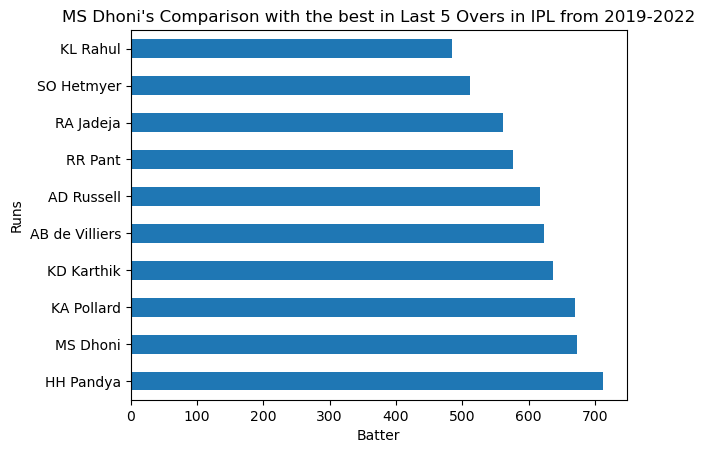

In [32]:
dataFrameDO.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')

plt.title(strPlayer+"'s Comparison with the best in Last 5 Overs in IPL from 2019-2022")
plt.xlabel('Batter')
plt.ylabel('Runs')
plt.show()

In [33]:
bdf1 = pd.DataFrame(dataFrameDO.groupby('striker')['runs_off_bat'].sum()).reset_index()
bdf1.head()

,striker,runs_off_bat
0,A Badoni,101
1,A Manohar,50
2,A Mishra,19
3,A Nortje,8
4,AB de Villiers,623


In [34]:
bdf2 = pd.DataFrame(dataFrameDO.groupby('striker')['ball'].count()).reset_index()
bdf2.head()

,striker,ball
0,A Badoni,73
1,A Manohar,37
2,A Mishra,20
3,A Nortje,13
4,AB de Villiers,281


In [35]:
bdf3 = bdf1.merge(bdf2, on = 'striker', how = 'left')
bdf3.head()

,striker,runs_off_bat,ball
0,A Badoni,101,73
1,A Manohar,50,37
2,A Mishra,19,20
3,A Nortje,8,13
4,AB de Villiers,623,281


In [36]:
bdf3['strike_rate'] = 100*bdf3['runs_off_bat']/bdf3['ball']
bdf3.head()

,striker,runs_off_bat,ball,strike_rate
0,A Badoni,101,73,138.356164
1,A Manohar,50,37,135.135135
2,A Mishra,19,20,95.000000
3,A Nortje,8,13,61.538462
4,AB de Villiers,623,281,221.708185


In [37]:
bdf3 = bdf3[bdf3.ball >= 30]
bdf3.head()

,striker,runs_off_bat,ball,strike_rate
0,A Badoni,101,73,138.356164
1,A Manohar,50,37,135.135135
4,AB de Villiers,623,281,221.708185
6,AD Russell,617,318,194.025157
10,AK Markram,159,85,187.058824


In [38]:
bdf3.reset_index(inplace = True, drop = True)
bdf3.sort_values('strike_rate', ascending = False)
bdf3.head()

,striker,runs_off_bat,ball,strike_rate
0,A Badoni,101,73,138.356164
1,A Manohar,50,37,135.135135
2,AB de Villiers,623,281,221.708185
3,AD Russell,617,318,194.025157
4,AK Markram,159,85,187.058824


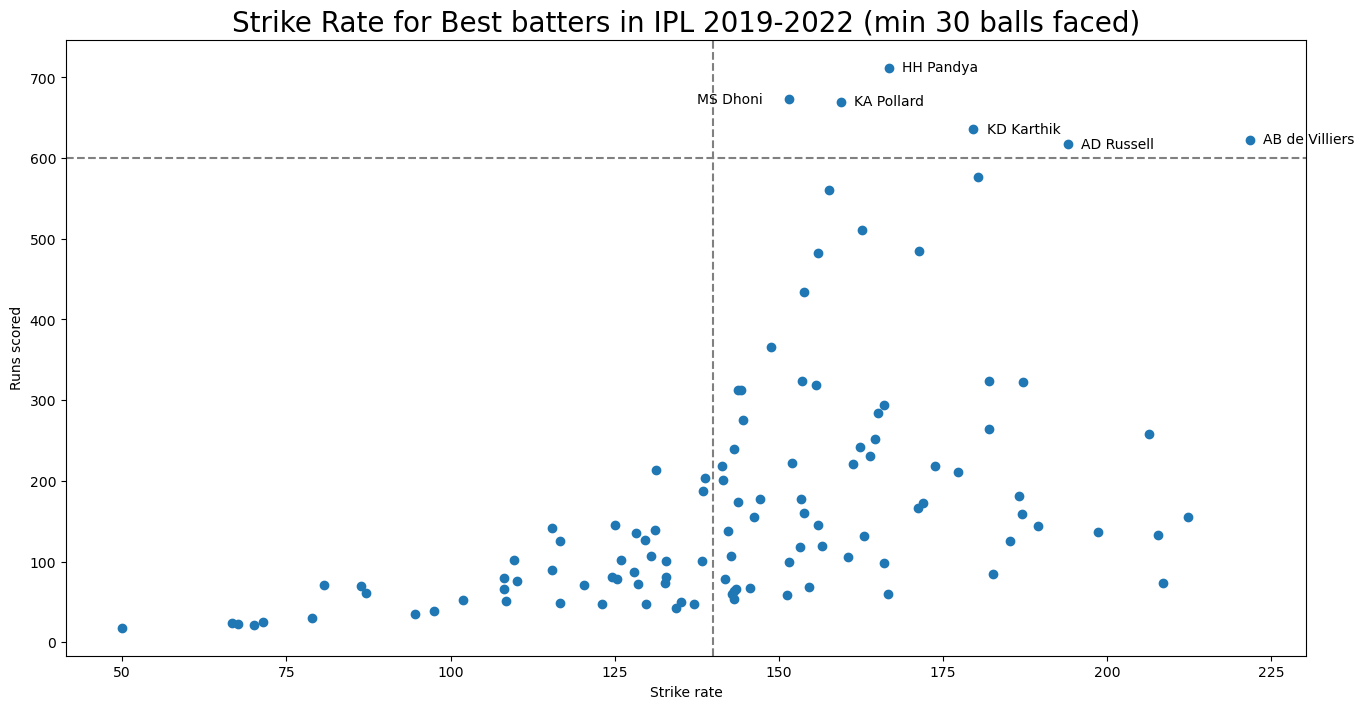

In [39]:
plt.figure(figsize = (16, 8))
plt.scatter(bdf3.strike_rate, bdf3.runs_off_bat)
for i in range(len(bdf3)):
    if(bdf3['runs_off_bat'][i] > 600):
        if(bdf3['striker'][i] == 'MS Dhoni'):
            plt.text(bdf3['strike_rate'][i] - 14, bdf3['runs_off_bat'][i] - 5, bdf3['striker'][i])
        else:
            plt.text(bdf3['strike_rate'][i] + 2, bdf3['runs_off_bat'][i] - 5, bdf3['striker'][i])
plt.axvline(140, ls = '--', color = 'grey')
plt.axhline(600, ls = '--', color = 'grey')
plt.title('Strike Rate for Best batters in IPL 2019-2022 (min 30 balls faced)', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

In [40]:
dataFrameOG.season.unique()

array(['2007/08', '2009', '2009/10', '2011', '2012', 2012, 2013, 2014,
       2015, 2016, 2017, 2019, 2018, '2018', '2019', '2020/21', '2021',
       2021, 2022], dtype=object)

In [41]:
dataFrameOG.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,2008
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008


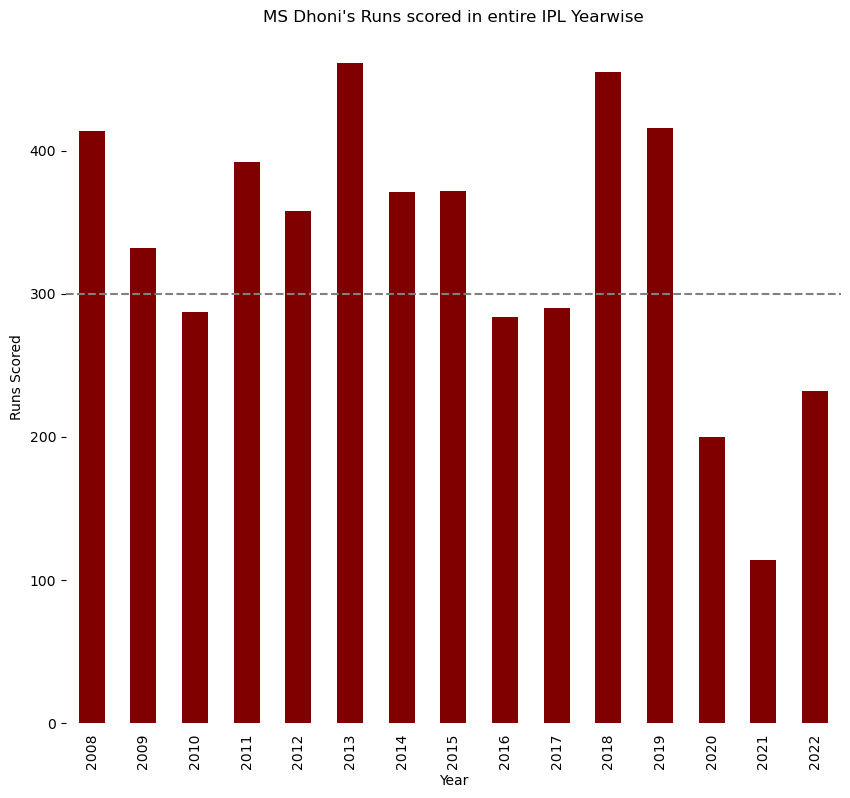

In [42]:
fig, ax = plt.subplots(figsize =(10, 9))
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

ax.xaxis.set_ticks_position('none')
# Add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)
    
dataFrameOG[dataFrameOG.striker == strPlayer].groupby(['year'])['runs_off_bat'].sum().plot(kind = 'bar', color ='maroon')
plt.title(strPlayer+"'s Runs scored in entire IPL Yearwise")
plt.xlabel('Year')
plt.ylabel('Runs Scored')
plt.axhline(300, ls = '--', color = 'grey')
plt.show()

In [43]:
dataFrameOGMSD = dataFrameOG[dataFrameOG.striker == strPlayer]
# dataFrameOGMSD.head()
len(dataFrameOGMSD[dataFrameOGMSD.runs_off_bat == 0])

1370

In [44]:
dataFrameOGMSD[dataFrameOGMSD.runs_off_bat == 0].head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
269,335983,2007/08,2008-04-19,"Punjab Cricket Association Stadium, Mohali",1,7.1,Chennai Super Kings,Kings XI Punjab,MS Dhoni,MEK Hussey,JR Hopes,0,0,NaN,NaN,NaN,NaN,NaN,lbw,MS Dhoni,NaN,NaN,2008
1719,335989,2007/08,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.1,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,0,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
1721,335989,2007/08,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,15.3,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DJ Bravo,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
1737,335989,2007/08,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,17.6,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,DS Kulkarni,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
1744,335989,2007/08,2008-04-23,"MA Chidambaram Stadium, Chepauk",1,18.7,Chennai Super Kings,Mumbai Indians,MS Dhoni,ML Hayden,A Nehra,0,0,NaN,NaN,NaN,NaN,NaN,run out,ML Hayden,NaN,NaN,2008


In [45]:
dfMSDDot = dataFrameOGMSD[dataFrameOGMSD['runs_off_bat']==0]
dfMSDFour = dataFrameOGMSD[dataFrameOGMSD['runs_off_bat']==4]
dfMSDSix = dataFrameOGMSD[dataFrameOGMSD['runs_off_bat']==6]
dfMSDBoundaries = dataFrameOGMSD[(dataFrameOGMSD['runs_off_bat']==6) | (dataFrameOGMSD['runs_off_bat']==4)]

In [46]:
dfMSDDot = dfMSDDot.groupby('year')['runs_off_bat'].count().reset_index()
dfMSDDot = dfMSDDot.rename(columns = {'runs_off_bat' : 'dot'})
dfMSDDot.head()

,year,dot
0,2008,124
1,2009,75
2,2010,66
3,2011,69
4,2012,87


In [47]:
dfMSDFour = dfMSDFour.groupby('year')['runs_off_bat'].count().reset_index()
dfMSDFour = dfMSDFour.rename(columns = {'runs_off_bat' : 'fours'})
dfMSDFour.head()

,year,fours
0,2008,38
1,2009,22
2,2010,26
3,2011,25
4,2012,26


In [48]:
dfMSDBoundaries = dfMSDBoundaries.groupby('year')['runs_off_bat'].count().reset_index()
dfMSDBoundaries = dfMSDBoundaries.rename(columns = {'runs_off_bat' : 'boundaries'})
dfMSDBoundaries.head()

,year,boundaries
0,2008,53
1,2009,31
2,2010,34
3,2011,48
4,2012,35


In [49]:
dfMSDSix = dfMSDSix.groupby('year')['runs_off_bat'].count().reset_index()
dfMSDSix = dfMSDSix.rename(columns = {'runs_off_bat' : 'sixes'})
dfMSDSix.head()

,year,sixes
0,2008,15
1,2009,9
2,2010,8
3,2011,23
4,2012,9


In [50]:
dfMSDDotBall = dataFrameOGMSD.groupby('year')['ball'].count().reset_index()
dfMSDDotBall.head()

,year,ball
0,2008,319
1,2009,270
2,2010,215
3,2011,247
4,2012,283


In [51]:
dfMSDDotBallPer = dfMSDDotBall.merge(dfMSDDot, on='year' ,how='right')
dfMSDDotBallPer.head()

,year,ball,dot
0,2008,319,124
1,2009,270,75
2,2010,215,66
3,2011,247,69
4,2012,283,87


In [52]:
dfMSDDotBallPer['Dot Percentage'] = 100*dfMSDDotBallPer['dot']/dfMSDDotBallPer['ball']
dfMSDDotBallPer.head()

,year,ball,dot,Dot Percentage
0,2008,319,124,38.871473
1,2009,270,75,27.777778
2,2010,215,66,30.697674
3,2011,247,69,27.935223
4,2012,283,87,30.742049


In [53]:
dfMSDDotBallPer.shape

(15, 4)

In [54]:
dfMSDTotalBoundaries = dfMSDDotBallPer;

In [55]:
dfMSDTotalBoundaries = dfMSDTotalBoundaries.merge(dfMSDFour, on='year' ,how='right')
dfMSDTotalBoundaries = dfMSDTotalBoundaries.merge(dfMSDSix, on='year' ,how='right')
dfMSDTotalBoundaries = dfMSDTotalBoundaries.merge(dfMSDBoundaries, on='year' ,how='right')

In [56]:
dfMSDTotalBoundaries

,year,ball,dot,Dot Percentage,fours,sixes,boundaries
0,2008,319,124,38.871473,38,15,53
1,2009,270,75,27.777778,22,9,31
2,2010,215,66,30.697674,26,8,34
3,2011,247,69,27.935223,25,23,48
4,2012,283,87,30.742049,26,9,35
5,2013,298,94,31.543624,32,25,57
6,2014,258,85,32.945736,22,20,42
7,2015,309,127,41.100324,27,17,44
8,2016,220,82,37.272727,18,14,32
9,2017,261,116,44.444444,15,16,31


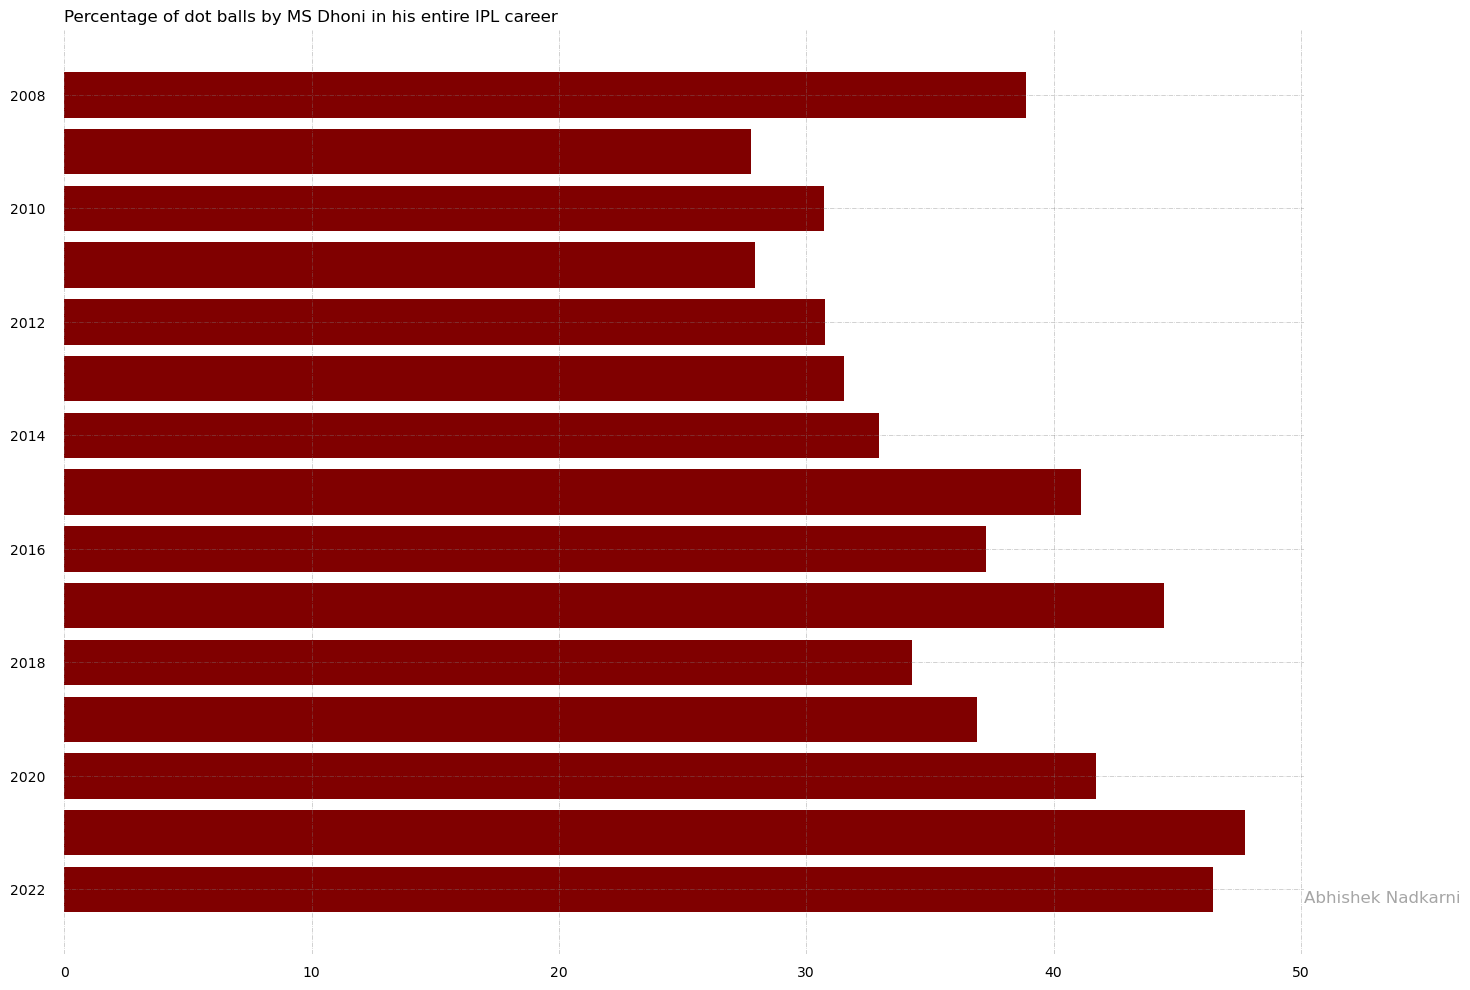

In [62]:

# plt.bar(dfMSDDotBallPer['year'], dfMSDDotBallPer['Dot Percentage'], color ='maroon')
# plt.title('Percentage of dot balls by '+strPlayer+' in his entire IPL career')
# plt.xlabel('IPL Year')
# plt.ylabel('Percentage')
# plt.show()
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 12))
 
# Horizontal Bar Plot
ax.barh(dfMSDDotBallPer['year'], dfMSDDotBallPer['Dot Percentage'], color='maroon')
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.5)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 12, fontweight ='bold', color ='grey')
 
# Add Plot Title
ax.set_title('Percentage of dot balls by '+strPlayer+' in his entire IPL career', loc ='left', )
 
# Add Text watermark
fig.text(0.9, 0.15, 'Abhishek Nadkarni', fontsize = 12, color ='grey', ha ='left', va ='bottom', alpha = 0.7)
 
# Show Plot
plt.show()

In [58]:
dataFrameL4Y.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,year
150460,1175356,2019,2019-03-23,MA Chidambaram Stadium,1,0.1,Royal Challengers Bangalore,Chennai Super Kings,V Kohli,PA Patel,DL Chahar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
150461,1175356,2019,2019-03-23,MA Chidambaram Stadium,1,0.2,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
150462,1175356,2019,2019-03-23,MA Chidambaram Stadium,1,0.3,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
150463,1175356,2019,2019-03-23,MA Chidambaram Stadium,1,0.4,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
150464,1175356,2019,2019-03-23,MA Chidambaram Stadium,1,0.5,Royal Challengers Bangalore,Chennai Super Kings,PA Patel,V Kohli,DL Chahar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [59]:
# Last 4 years middle order batsmen
strMODB = "RR Pant|HH Pandya|AD Russell|MS Dhoni|AT Rayadu|KD Karthik|KA Pollard|GJ Maxwell|AB de Villiers|N Pooran|SO Hetmyer|DA Miller|MP Stoinis|RA Jadeja|S Dube"
dataFrameL4YMOB = dataFrameL4Y[dataFrameL4Y["striker"].str.contains(strMODB) == True]
dataFrameL4YMOB.shape

(9901, 23)

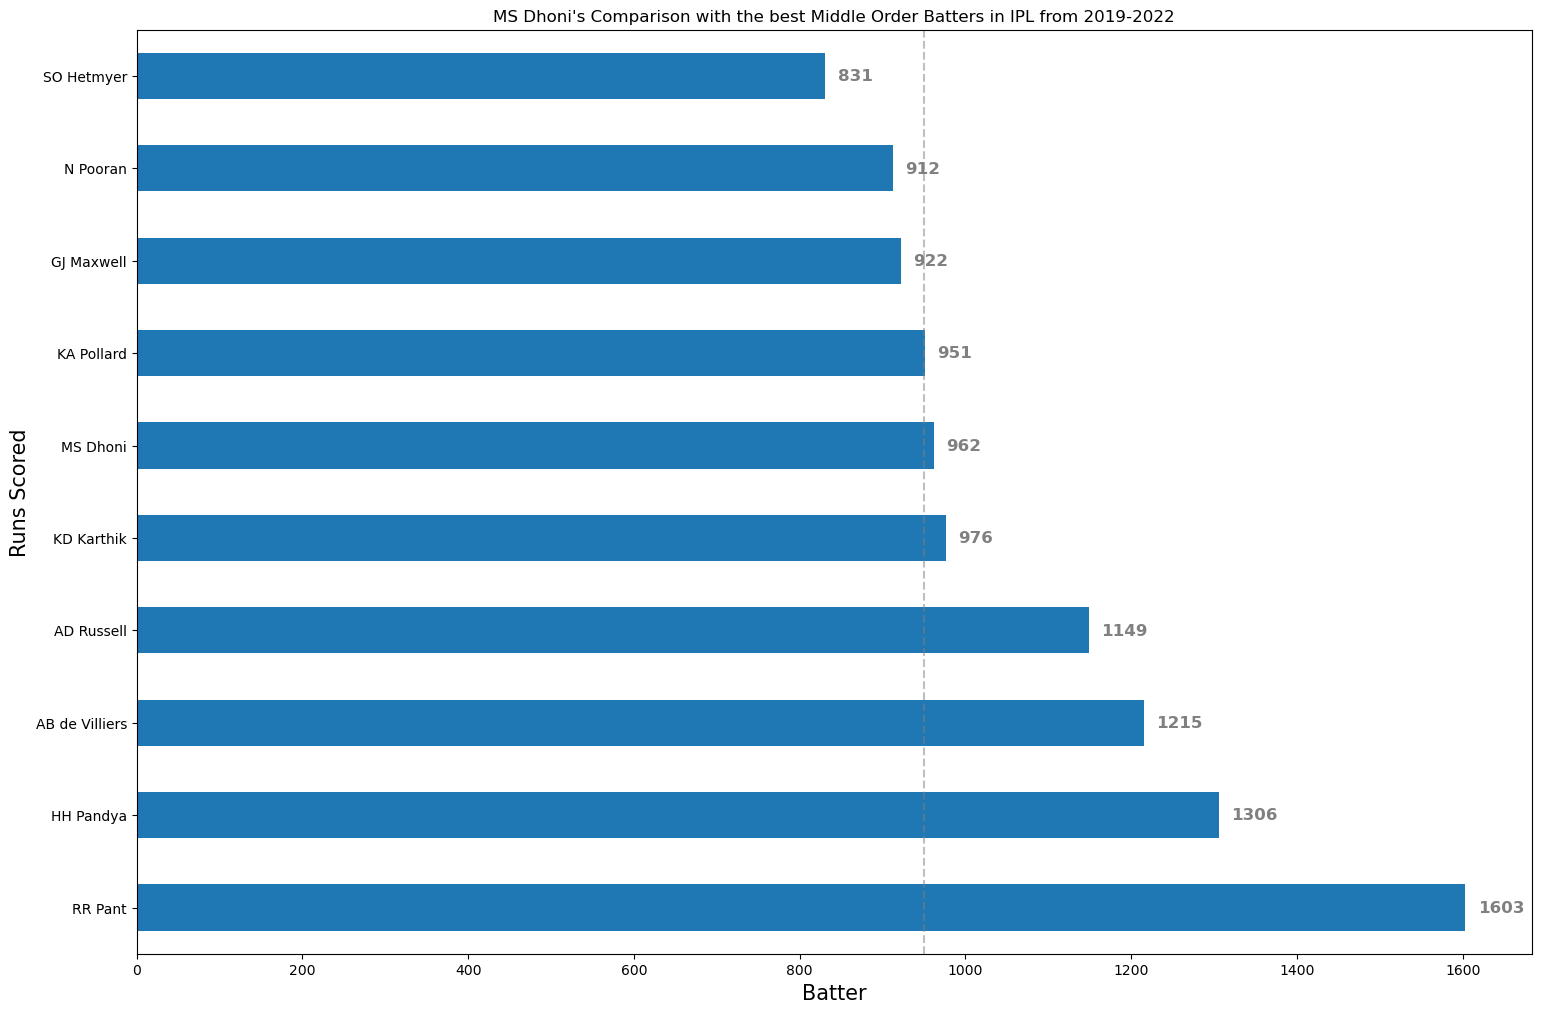

In [60]:
# Figure Size
fig, ax = plt.subplots(figsize =(18, 12))

dataFrameL4YMOB.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending = False).head(10).plot(kind = 'barh')

plt.title(strPlayer+"'s Comparison with the best Middle Order Batters in IPL from 2019-2022")
plt.xlabel('Batter', fontsize=15)
plt.ylabel('Runs Scored', fontsize=15)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+15, i.get_y()+0.2, str(round((i.get_width()), 2)), fontsize = 12, fontweight ='bold', color ='grey')
 
plt.axvline(950, ls = '--', color = 'grey', alpha=0.5)

plt.show()

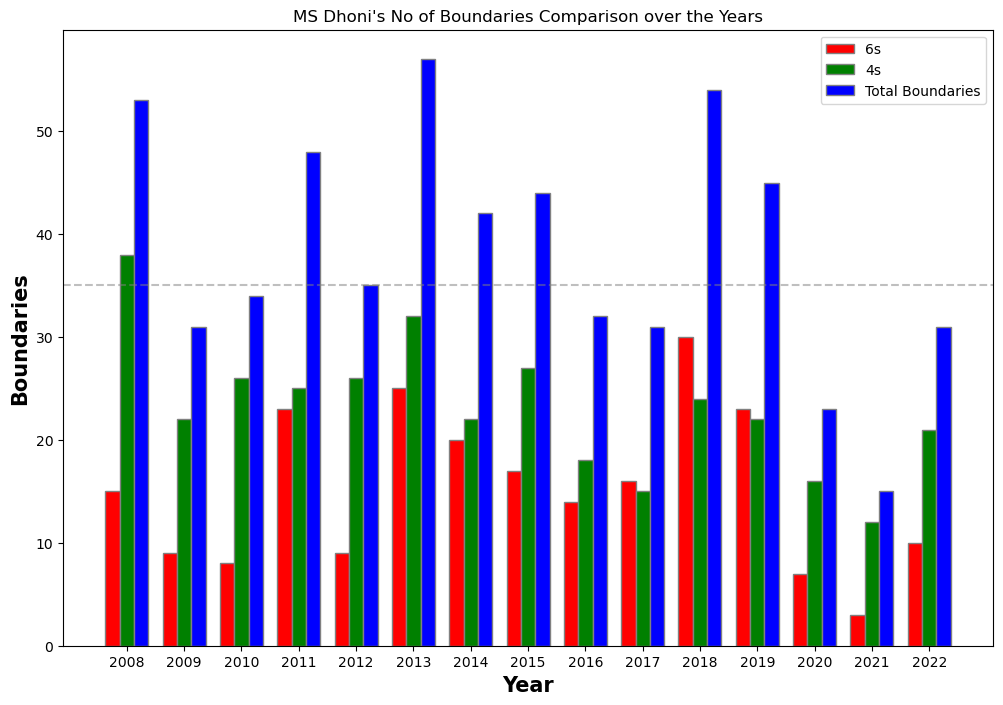

In [61]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

plt.title(strPlayer+"'s No of Boundaries Comparison over the Years")
 
# set height of bar
SIXES = dfMSDTotalBoundaries['sixes'].values
FOURS = dfMSDTotalBoundaries['fours'].values
BOUNDARIES = dfMSDTotalBoundaries['boundaries'].values
 
# Set position of bar on X axis
br1 = np.arange(len(SIXES))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, SIXES, color ='r', width = barWidth,
        edgecolor ='grey', label ='6s')
plt.bar(br2, FOURS, color ='g', width = barWidth,
        edgecolor ='grey', label ='4s')
plt.bar(br3, BOUNDARIES, color ='b', width = barWidth,
        edgecolor ='grey', label ='Total Boundaries')

plt.axhline(35, ls = '--', color = 'grey', alpha=0.5)

# Adding Xticks
plt.xlabel('Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Boundaries', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(SIXES))],
        dfMSDTotalBoundaries['year'].values)
 
plt.legend()
plt.show()